In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cases_state = pd.read_csv('./data/cases_state.csv')
cases_state

,Unnamed: 0,Unnamed: 0.1,date,state,cases_import,cases_new,cases_recovered
0,0,0,2020-01-25,Johor,4,4,0
1,1,1,2020-01-25,Kedah,0,0,0
2,2,2,2020-01-25,Kelantan,0,0,0
3,3,3,2020-01-25,Melaka,0,0,0
4,4,4,2020-01-25,Negeri Sembilan,0,0,0
...,...,...,...,...,...,...,...
9563,9563,9563,2021-09-13,Selangor,7,1947,3593
9564,9564,9564,2021-09-13,Terengganu,0,704,620
9565,9565,9565,2021-09-13,W.P. Kuala Lumpur,10,398,681
9566,9566,9566,2021-09-13,W.P. Labuan,0,11,2


In [3]:
#check the data types of cases_state dataset
cases_state.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
date               object
state              object
cases_import        int64
cases_new           int64
cases_recovered     int64
dtype: object

In [4]:
#check is there any null values cases_state dataset
cases_state.isnull()

,Unnamed: 0,Unnamed: 0.1,date,state,cases_import,cases_new,cases_recovered
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
9563,False,False,False,False,False,False,False
9564,False,False,False,False,False,False,False
9565,False,False,False,False,False,False,False
9566,False,False,False,False,False,False,False


In [5]:
#check the details of the cases_state dataset
cases_state.describe()

,Unnamed: 0,Unnamed: 0.1,cases_import,cases_new,cases_recovered
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,4783.500000,4783.500000,0.485472,208.588106,182.537939
std,2762.188022,2762.188022,2.182965,621.363279,584.124768
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2391.750000,2391.750000,0.000000,0.000000,0.000000
50%,4783.500000,4783.500000,0.000000,7.000000,6.000000
75%,7175.250000,7175.250000,0.000000,134.000000,107.000000
max,9567.000000,9567.000000,72.000000,8792.000000,8801.000000


In [6]:
#we decide to fill all the null value with zero,since only cases recovered have null value
#and the value is null because the still havent updated the recovered cases or 
#maybe there are no patient recovered
cases_state.fillna((0), inplace=True)
cases_state.describe()

,Unnamed: 0,Unnamed: 0.1,cases_import,cases_new,cases_recovered
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,4783.500000,4783.500000,0.485472,208.588106,182.537939
std,2762.188022,2762.188022,2.182965,621.363279,584.124768
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2391.750000,2391.750000,0.000000,0.000000,0.000000
50%,4783.500000,4783.500000,0.000000,7.000000,6.000000
75%,7175.250000,7175.250000,0.000000,134.000000,107.000000
max,9567.000000,9567.000000,72.000000,8792.000000,8801.000000


In [7]:
#to find all the different states in the datasets
states = cases_state['state'].unique()
states

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan',
       'W.P. Putrajaya'], dtype=object)

In [8]:
cases_malaysia = pd.read_csv('./data/cases_malaysia.csv')
cases_malaysia.fillna((0), inplace=True)
cases_malaysia

,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-01-25,4,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-26,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-27,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-28,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-29,3,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
593,2021-09-09,19307,6,24855,0.0,0.0,332.0,0.0,74.0,39.0,918.0
594,2021-09-10,21176,4,21476,0.0,0.0,326.0,36.0,40.0,23.0,1446.0
595,2021-09-11,19550,7,21771,0.0,0.0,551.0,99.0,51.0,38.0,1052.0
596,2021-09-12,19198,5,20980,0.0,2.0,544.0,12.0,9.0,69.0,947.0


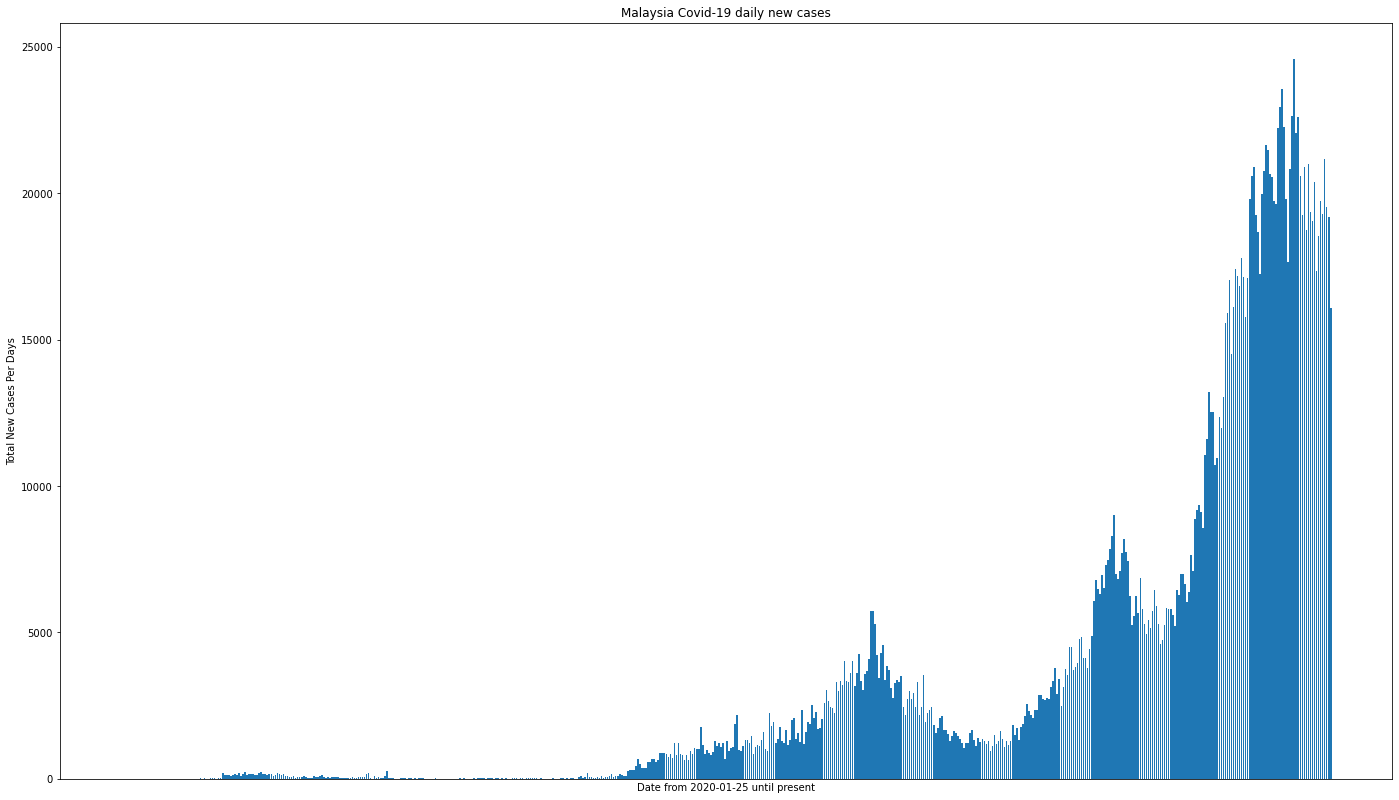

In [9]:
#this is the daily covid-19 new cases in malaysia

#StreamLit

#This is a histogram of new cases reported in Malaysia on a daily basis. Based on this graph, we divided Malaysia into three waves.
#The first wave will run from 2020-01-25 to 2020-7-12.The second wave runs from 2020-07-13 to 2021-3-29.
#For the third wave which is the wave that we currently experiencing is from 2021-3-30 until present.

#Streamlit

fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_axes([0,0,1,1])
ax.bar(cases_malaysia['date'], cases_malaysia['cases_new'],data = cases_malaysia)
ax.set_ylabel('Total New Cases Per Days')
ax.set_xlabel('Date from 2020-01-25 until present')
ax.axes.xaxis.set_ticks([])
ax.set_title('Malaysia Covid-19 daily new cases')
plt.show()

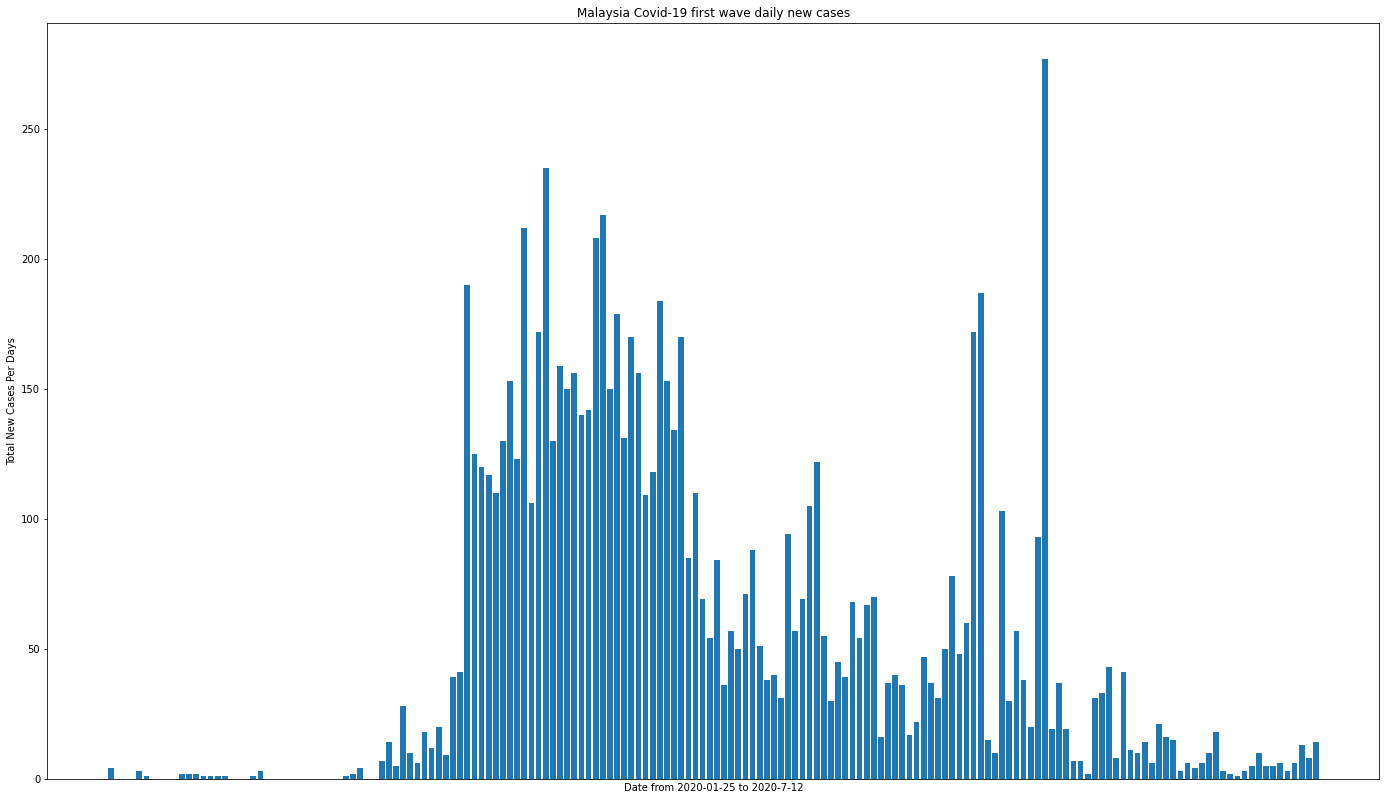

In [10]:
#from 2020-01-25 to 2020-7-12 wave 1
wave1 = cases_malaysia.iloc[:170]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_axes([0,0,1,1])
ax.bar(wave1['date'], wave1['cases_new'],data = wave1)
ax.set_ylabel('Total New Cases Per Days')
ax.set_xlabel('Date from 2020-01-25 to 2020-7-12')
ax.axes.xaxis.set_ticks([])
ax.set_title('Malaysia Covid-19 first wave daily new cases')
plt.show()

In [11]:
#streamlit //zhihang : this short paragrah display it after you show all 3 waves lah

#Each of the waves in Malaysia is represented by one of these three histogram graphs. 
#We can see from the graph that the quantity and number of cases are very different. 
#For example, the first wave has less than 300 cases per day, but the second wave has 
#around 6000 and the third wave has more than 20000 cases per day. As a result, 
#we must divide the dataset into three waves in order to better analyse it.

#streamlit

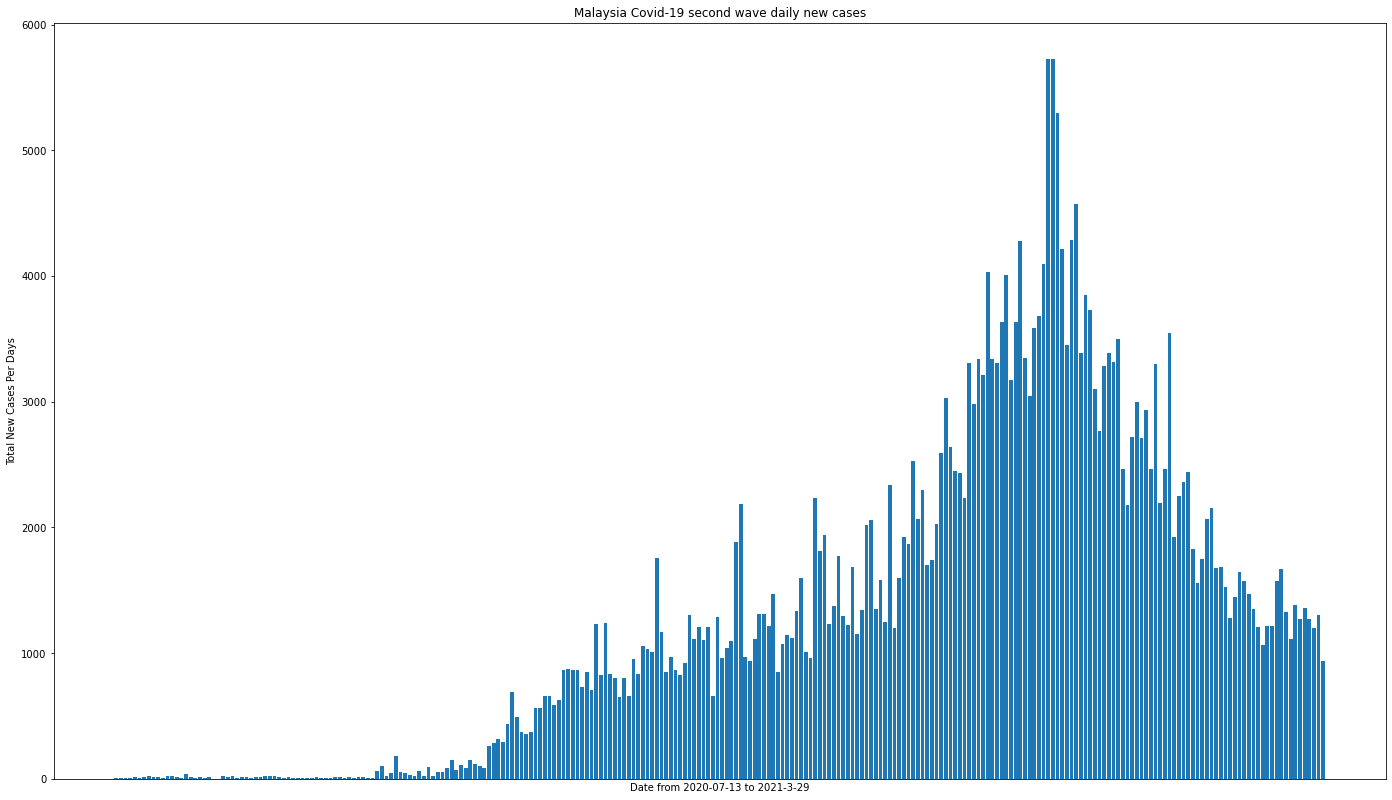

In [12]:
#from 2020-07-13 to 2021-3-29 wave 2
wave2 = cases_malaysia.iloc[170:430]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_axes([0,0,1,1])
ax.bar(wave2['date'], wave2['cases_new'],data = wave2)
ax.set_ylabel('Total New Cases Per Days')
ax.set_xlabel('Date from 2020-07-13 to 2021-3-29')
ax.axes.xaxis.set_ticks([])
ax.set_title('Malaysia Covid-19 second wave daily new cases')
plt.show()

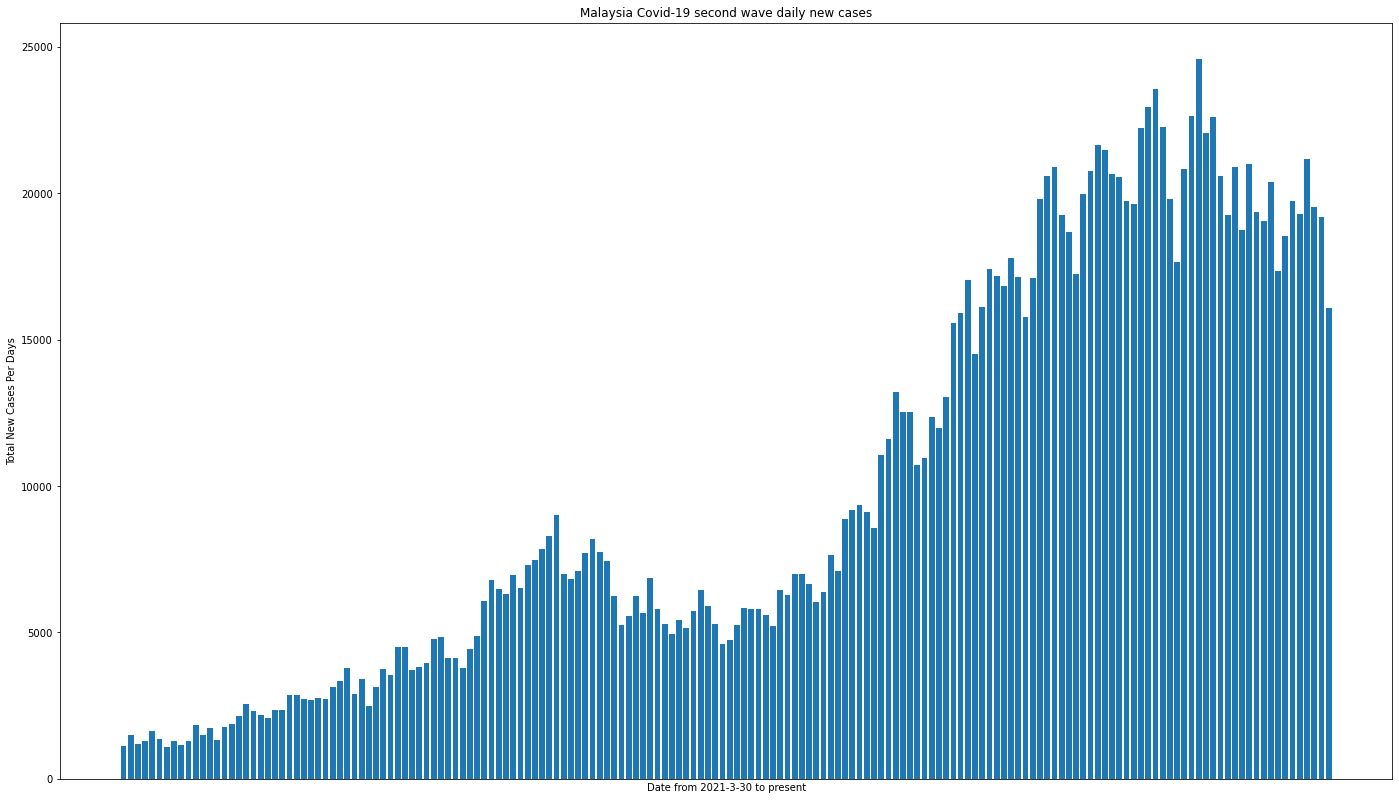

In [13]:
#from 2021-3-30 to present wave 3
wave3 = cases_malaysia.iloc[430:]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_axes([0,0,1,1])
ax.bar(wave3['date'], wave3['cases_new'],data = wave3)
ax.set_ylabel('Total New Cases Per Days')
ax.set_xlabel('Date from 2021-3-30 to present')
ax.axes.xaxis.set_ticks([])
ax.set_title('Malaysia Covid-19 second wave daily new cases')
plt.show()

In [14]:
#classify the cases_state datasets to 3 different waves
num_of_state = 16
wave1_each_states = cases_state.iloc[:170*num_of_state]
wave2_each_states = cases_state.iloc[170*num_of_state:430*num_of_state]
wave3_each_states = cases_state.iloc[430*num_of_state:]

In [15]:
#get the population of each state

population = pd.read_csv('./data/population.csv')
population.drop(['pop_18','pop_60','idxs'],axis='columns', inplace=True)
population.drop(0,axis='rows', inplace=True)
state_index = np.arange(16)
population.index = state_index
population

,state,pop
0,Johor,3781000
1,Kedah,2185100
2,Kelantan,1906700
3,Melaka,932700
4,Negeri Sembilan,1128800
5,Pahang,1678700
6,Pulau Pinang,1773600
7,Perak,2510300
8,Perlis,254900
9,Selangor,6538000


In [16]:
#rearrange the dataset so the states arrangement will be same as the each states daily cases's datasets

temp = population.iloc[6]
population.iloc[6] = population.iloc[7]
population.iloc[7] = temp
temp = population.iloc[7]
population.iloc[7] = population.iloc[8]
population.iloc[8] = temp
temp = population.iloc[9]
population.iloc[9] = population.iloc[11]
population.iloc[11] = temp
temp = population.iloc[10]
population.iloc[10] = population.iloc[12]
population.iloc[12] = temp
population

,state,pop
0,Johor,3781000
1,Kedah,2185100
2,Kelantan,1906700
3,Melaka,932700
4,Negeri Sembilan,1128800
5,Pahang,1678700
6,Perak,2510300
7,Perlis,254900
8,Pulau Pinang,1773600
9,Sabah,3908500


In [51]:
def get_result(wave,wave_num) :
    
    #calculate the total cases for each states
    print('Wave '+ str(wave_num) +' : each states total cases')
    wave = wave.groupby(["state"]).agg({"cases_new": "sum"})
    wave = wave.reset_index()
    wave = wave.rename(columns={"cases_new" : "total_cases"})
    wave["total_cases"] = wave["total_cases"].astype('float')
    display(wave)
    
    #calculate the total cases / each state population for each state
    each_state_total_cases = wave
    each_state_total_cases["total_cases"] = each_state_total_cases["total_cases"] / population["pop"]
    each_state_total_cases_devide_by_population = each_state_total_cases
    each_state_total_cases_devide_by_population = each_state_total_cases_devide_by_population.rename(columns={"total_cases" : "total_cases / Population"})
    
    #normalize the datasets
    column_maxes = each_state_total_cases_devide_by_population['total_cases / Population'].max()
    each_state_total_cases_devide_by_population['total_cases / Population'] = each_state_total_cases_devide_by_population['total_cases / Population'] / column_maxes
    print('Wave '+ str(wave_num) +' : each states total cases / polution after normalize')
    display(each_state_total_cases_devide_by_population)
    
    outlierDetection = each_state_total_cases_devide_by_population
    
    #display the bar chart of each state total_cases / Population
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5, forward=True)
    ax = fig.add_axes([0,0,1,1])
    ax.bar(outlierDetection['state'], outlierDetection['total_cases / Population'],data = outlierDetection)
    ax.set_ylabel('total_cases / Population')
    ax.set_xlabel('state')
    ax.set_title('Bar Chart of each state')
    plt.show()
    
    #display the boxplot of each state total_cases / Population
    fig = plt.figure(figsize=(20,5))
    plt.boxplot(outlierDetection['total_cases / Population'],vert = False)
    plt.title("Box Plot of each state")
    plt.ylabel("total_cases / Population")
    plt.tight_layout()
    plt.show()
    
    #to calculate the IQR so we can find for the outlier
    Q1 = outlierDetection.quantile(0.25)
    Q3 = outlierDetection.quantile(0.75)
    IQR = Q3 - Q1
    IQR['total_cases / Population']
    
    #to classified each state risk based on their total_cases / Population
    VeryHighRisk = outlierDetection[outlierDetection['total_cases / Population'] > (Q3['total_cases / Population'] + 1.5*IQR['total_cases / Population'])]
    print('Very High Risk States')
    if len(VeryHighRisk) == 0 :
        print('')
        print('None')
        print('')
    else :
        display(VeryHighRisk)

    HighRisk = outlierDetection[outlierDetection['total_cases / Population'] >= Q3['total_cases / Population']]
    HighRisk = HighRisk[HighRisk['total_cases / Population'] < (Q3['total_cases / Population'] + IQR['total_cases / Population'])]
    print('High Risk States')
    display(HighRisk)

    MediumRisk = outlierDetection[outlierDetection['total_cases / Population'] >= Q1['total_cases / Population']]
    MediumRisk = MediumRisk[MediumRisk['total_cases / Population'] < Q3['total_cases / Population']]
    print('Medium Risk States')
    display(MediumRisk)

    LowRisk = outlierDetection[outlierDetection['total_cases / Population'] < Q1['total_cases / Population']]
    print('Low Risk States')
    display(LowRisk)
    

    

In [52]:
#StreamLit 

#The tables and graphs below demonstrate some of the analysis we perform for each of the waves in each state.
#First, we compute the total number of cases for each of the states during the selected wave.
#Following that, we divided the total number of cases by the population of each state and normalised the result.
#The reason we divide it by population. It is due to the fact that some states may have a high number of cases 
#while also having a relatively high population. So, dividing the total cases by the population will be a better 
#measurement for us to analyse the state's situation. Finally, we will categorise each state's risk level based 
#on its quantile location.
#For all the upper outlier we be group in the very high risk state.
#For the states that are located in the Q3 and Q4 range will be consider as high risk state.
#Next,for the state that is located in the Q1 to Q2 range will be consider as medium risk state.
#Lastly,for the state that is located in below Q1 will be consider as low risk state.


#Streamlit

Wave 1 : each states total cases


,state,total_cases
0,Johor,702.0
1,Kedah,98.0
2,Kelantan,157.0
3,Melaka,252.0
4,Negeri Sembilan,1028.0
5,Pahang,368.0
6,Perak,257.0
7,Perlis,18.0
8,Pulau Pinang,120.0
9,Sabah,381.0


Wave 1 : each states total cases / polution after normalize


,state,total_cases / Population
0,Johor,0.134910
1,Kedah,0.032589
2,Kelantan,0.059831
3,Melaka,0.196323
4,Negeri Sembilan,0.661742
5,Pahang,0.159289
6,Perak,0.074391
7,Perlis,0.051312
8,Pulau Pinang,0.049163
9,Sabah,0.070832


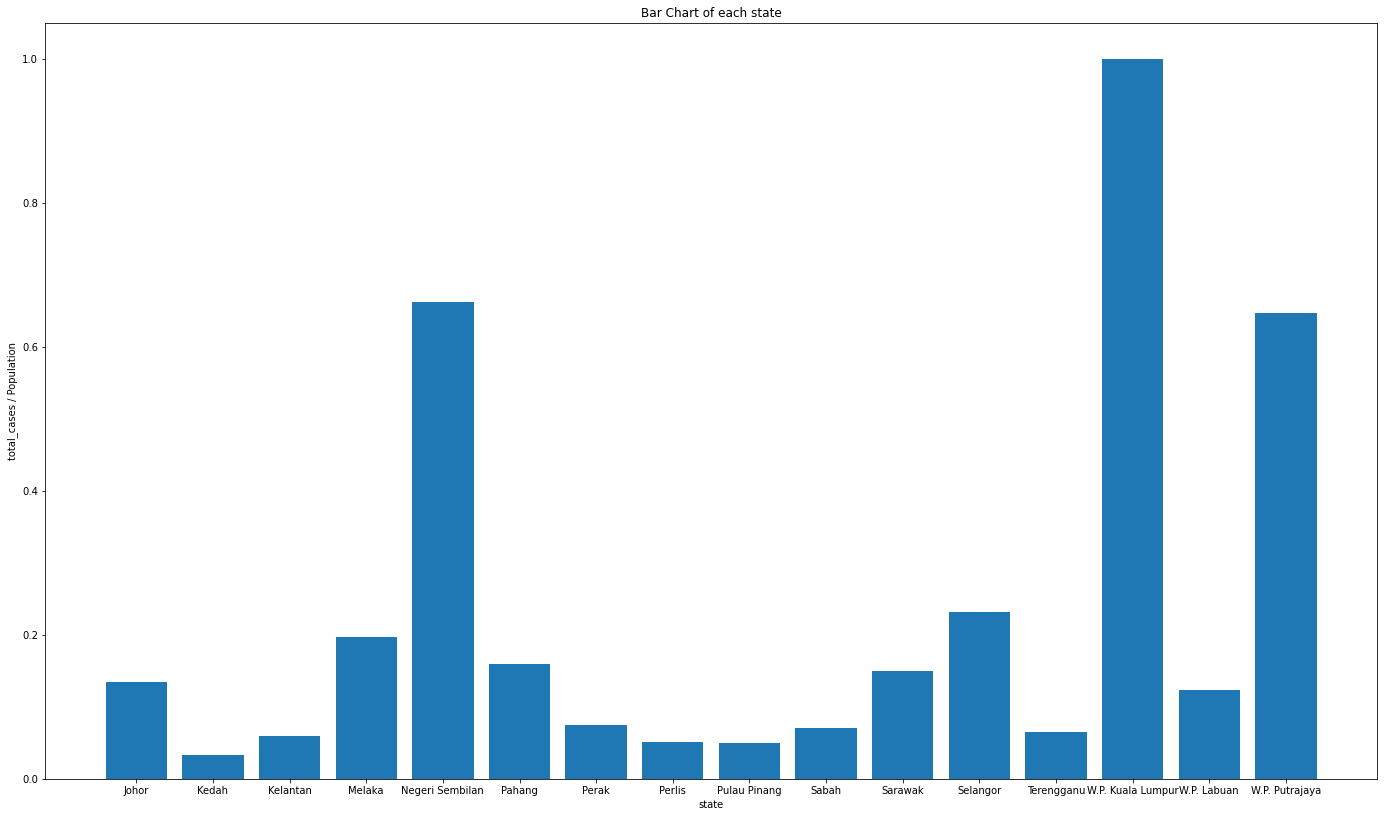

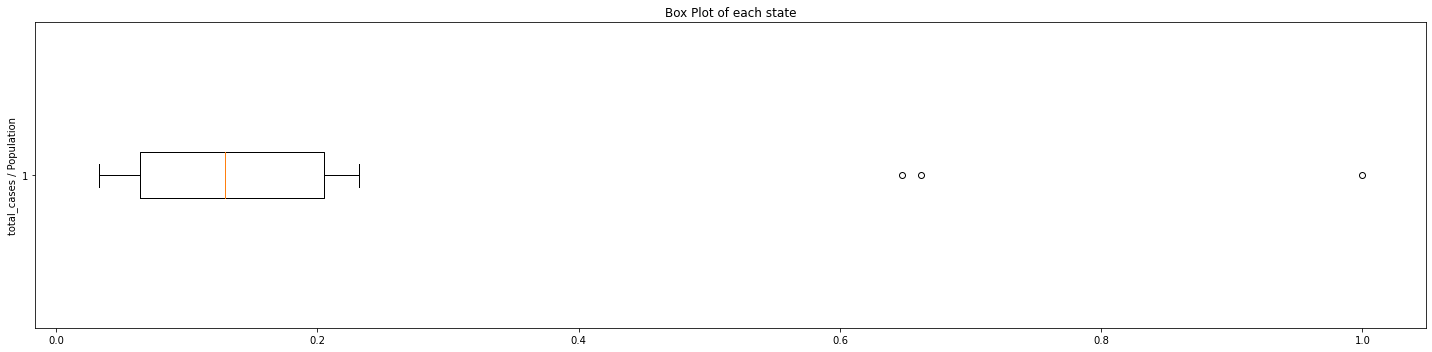

Very High Risk States


,state,total_cases / Population
4,Negeri Sembilan,0.661742
13,W.P. Kuala Lumpur,1.000000
15,W.P. Putrajaya,0.647360


High Risk States


,state,total_cases / Population
11,Selangor,0.23217


Medium Risk States


,state,total_cases / Population
0,Johor,0.134910
3,Melaka,0.196323
5,Pahang,0.159289
6,Perak,0.074391
9,Sabah,0.070832
10,Sarawak,0.149376
12,Terengganu,0.065202
14,W.P. Labuan,0.124023


Low Risk States


,state,total_cases / Population
1,Kedah,0.032589
2,Kelantan,0.059831
7,Perlis,0.051312
8,Pulau Pinang,0.049163


In [53]:
get_result(wave1_each_states,1)

#Streamlit

#According to the results, wave 1 has a much lower number of cases than the other waves, 
#and the majority of the cases are from three states: Negeri Sembilan, W.P. Kuala Lumpur, 
#and Selangor. However, when total cases are divided by population, W.P Putrajaya has a 
#higher value than Selangor.
#So, these four states are more risky than the others and 
#all this states are very close to each other.For the 4 low risks states which are Kedah, Kelantan, Perlis 
#and Pulau Penang ,their location are very close to each other too and are not near to the 4 very high risk and high risk states.

#Streamlit


Wave 2 : each states total cases


,state,total_cases
0,Johor,40374.0
1,Kedah,8259.0
2,Kelantan,5992.0
3,Melaka,6238.0
4,Negeri Sembilan,16170.0
5,Pahang,3849.0
6,Perak,12632.0
7,Perlis,310.0
8,Pulau Pinang,15553.0
9,Sabah,54277.0


Wave 2 : each states total cases / polution after normalize


,state,total_cases / Population
0,Johor,0.462208
1,Kedah,0.163606
2,Kelantan,0.136029
3,Melaka,0.289498
4,Negeri Sembilan,0.620063
5,Pahang,0.099247
6,Perak,0.217816
7,Perlis,0.052642
8,Pulau Pinang,0.379578
9,Sabah,0.601102


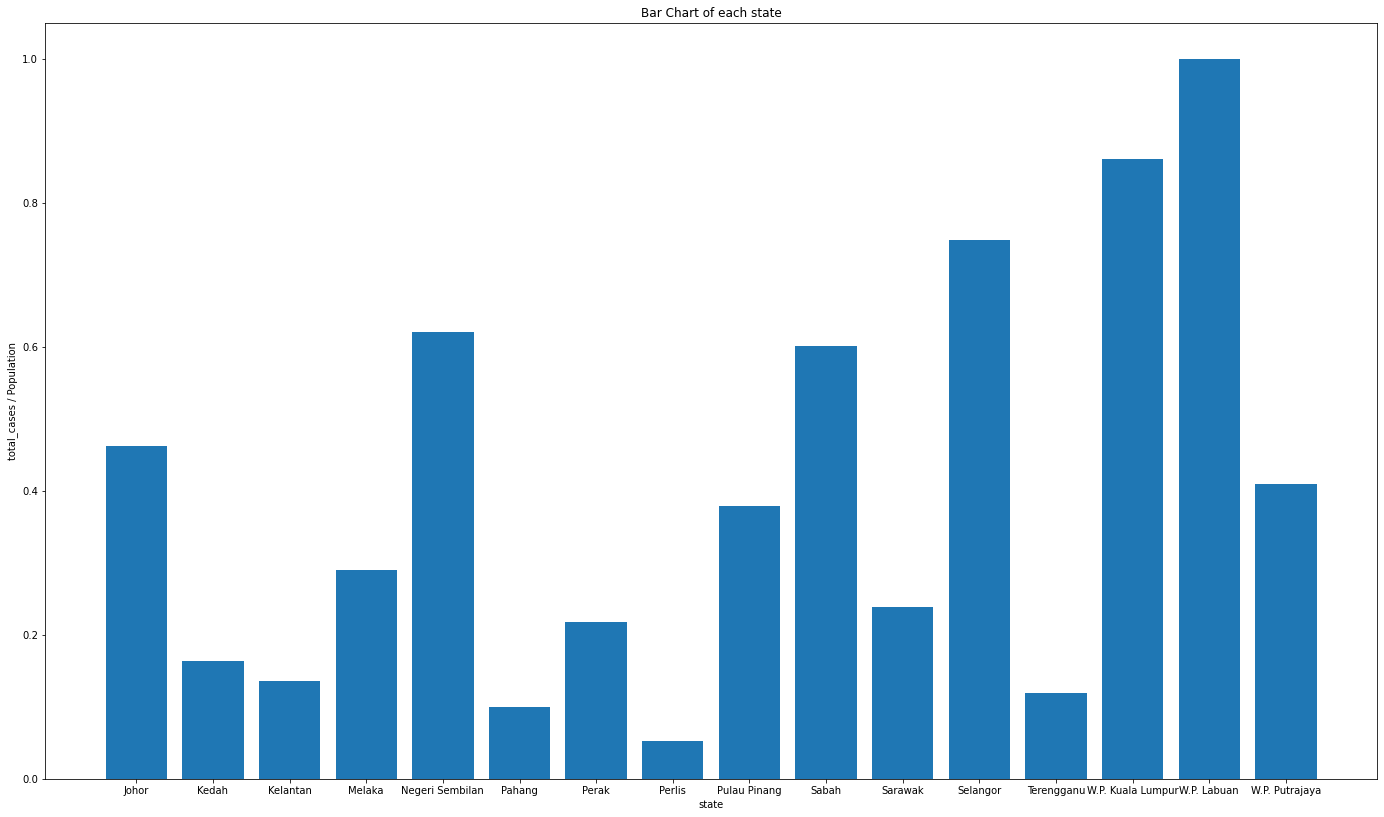

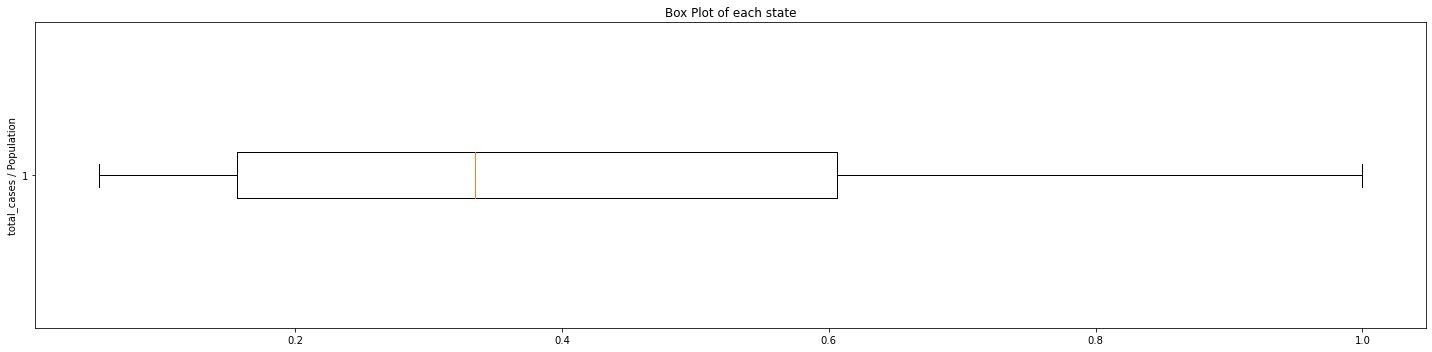

Very High Risk States

None

High Risk States


,state,total_cases / Population
4,Negeri Sembilan,0.620063
11,Selangor,0.747659
13,W.P. Kuala Lumpur,0.861049
14,W.P. Labuan,1.000000


Medium Risk States


,state,total_cases / Population
0,Johor,0.462208
1,Kedah,0.163606
3,Melaka,0.289498
6,Perak,0.217816
8,Pulau Pinang,0.379578
9,Sabah,0.601102
10,Sarawak,0.237936
15,W.P. Putrajaya,0.409245


Low Risk States


,state,total_cases / Population
2,Kelantan,0.136029
5,Pahang,0.099247
7,Perlis,0.052642
12,Terengganu,0.119548


In [54]:
get_result(wave2_each_states,2)

#Streamlit

#Based on the results,the distribution of each states total_cases devide by the population in the barplot is more even than wave 1.
#The boxplot shape also is approximately symmetric and there is no outlier.So,there is no very high risk state and majority of the state
#is located in the medium risk states.

#Streamlit

Wave 3 : each states total cases


,state,total_cases
0,Johor,125178.0
1,Kedah,110761.0
2,Kelantan,88655.0
3,Melaka,46954.0
4,Negeri Sembilan,77426.0
5,Pahang,48291.0
6,Perak,70775.0
7,Perlis,2504.0
8,Pulau Pinang,93830.0
9,Sabah,120855.0


Wave 3 : each states total cases / polution after normalize


,state,total_cases / Population
0,Johor,0.409514
1,Kedah,0.626993
2,Kelantan,0.575133
3,Melaka,0.622699
4,Negeri Sembilan,0.848432
5,Pahang,0.355828
6,Perak,0.348740
7,Perlis,0.121510
8,Pulau Pinang,0.654385
9,Sabah,0.382474


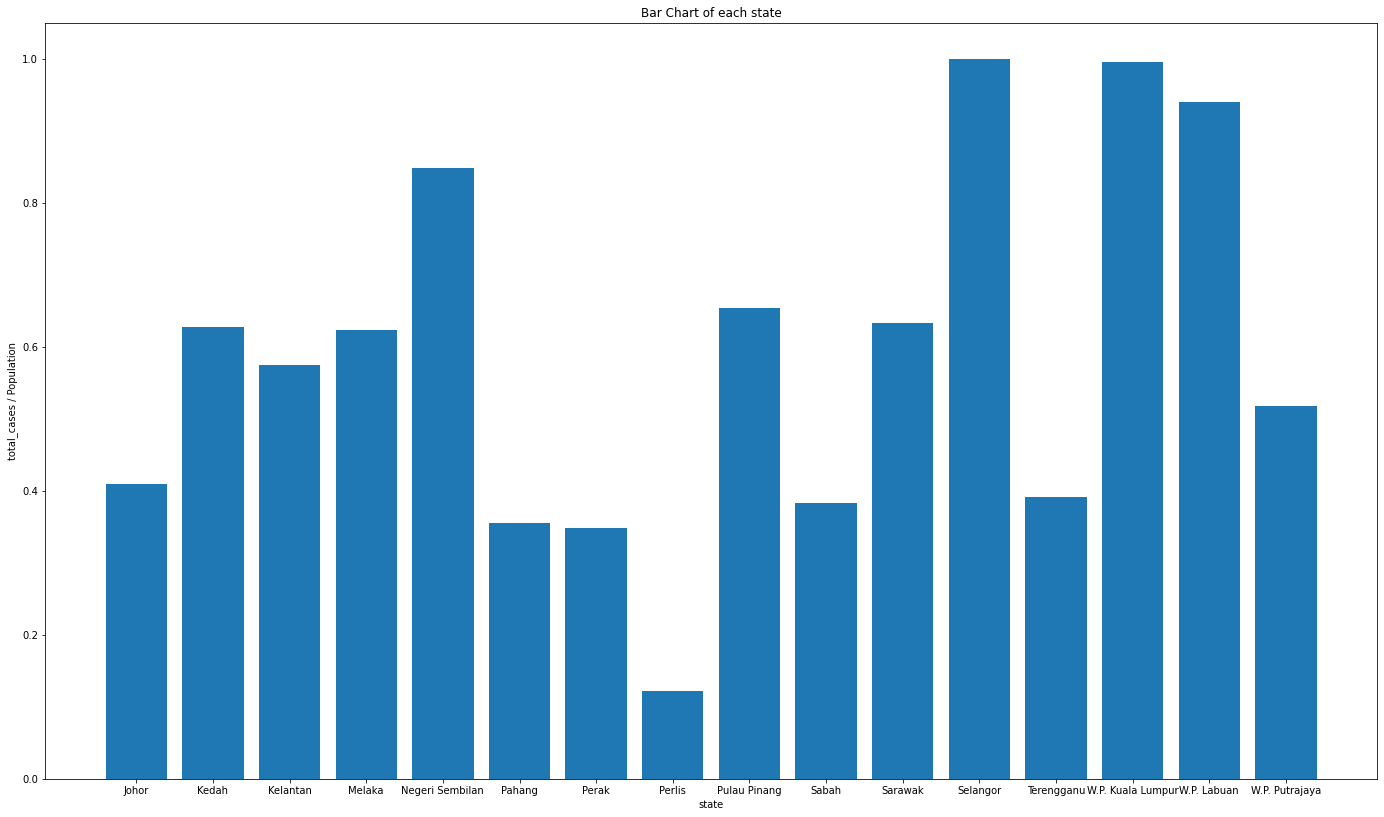

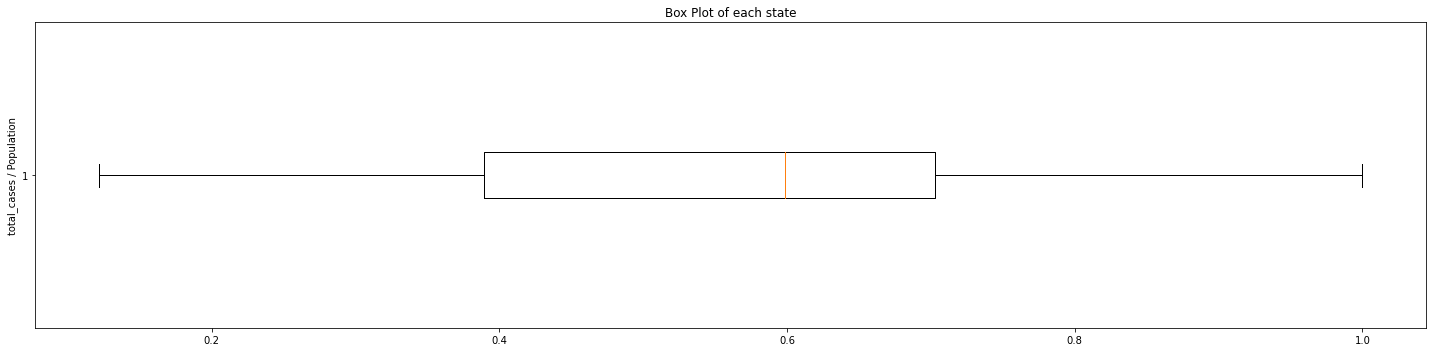

Very High Risk States

None

High Risk States


,state,total_cases / Population
4,Negeri Sembilan,0.848432
11,Selangor,1.000000
13,W.P. Kuala Lumpur,0.995442
14,W.P. Labuan,0.939873


Medium Risk States


,state,total_cases / Population
0,Johor,0.409514
1,Kedah,0.626993
2,Kelantan,0.575133
3,Melaka,0.622699
8,Pulau Pinang,0.654385
10,Sarawak,0.633549
12,Terengganu,0.392071
15,W.P. Putrajaya,0.518276


Low Risk States


,state,total_cases / Population
5,Pahang,0.355828
6,Perak,0.348740
7,Perlis,0.121510
9,Sabah,0.382474


In [55]:
get_result(wave3_each_states,3)

#Streamlit

#For wave 3 is similar to wave 2 is just the scale of number of total cases for each states is way more higher.
#The boxplot shape of wave 3 also is approximately symmetric and there is no outlier.
#So,similar to wave 2, most of the states also is located in the medium risk state range.

#Streamlit

In [62]:
tests_state = pd.read_csv('./data/tests_state.csv')
tests_state

,Unnamed: 0,date,state,rtk-ag,pcr,total
0,0,2021-07-01,Johor,2749,3670,6419
1,1,2021-07-01,Kedah,2073,1297,3370
2,2,2021-07-01,Kelantan,1348,1966,3314
3,3,2021-07-01,Melaka,1049,2132,3181
4,4,2021-07-01,Negeri Sembilan,2151,3306,5457
...,...,...,...,...,...,...
1179,1179,2021-09-12,Selangor,8713,7277,15990
1180,1180,2021-09-12,Terengganu,3227,3152,6379
1181,1181,2021-09-12,W.P. Kuala Lumpur,1836,2554,4390
1182,1182,2021-09-12,W.P. Labuan,268,149,417


In [63]:
tests_state.dtypes

Unnamed: 0     int64
date          object
state         object
rtk-ag         int64
pcr            int64
total          int64
dtype: object

In [64]:
#mean this dataset no null value
tests_state.isna().sum()

Unnamed: 0    0
date          0
state         0
rtk-ag        0
pcr           0
total         0
dtype: int64

In [65]:
tests_state.drop_duplicates()

,Unnamed: 0,date,state,rtk-ag,pcr,total
0,0,2021-07-01,Johor,2749,3670,6419
1,1,2021-07-01,Kedah,2073,1297,3370
2,2,2021-07-01,Kelantan,1348,1966,3314
3,3,2021-07-01,Melaka,1049,2132,3181
4,4,2021-07-01,Negeri Sembilan,2151,3306,5457
...,...,...,...,...,...,...
1179,1179,2021-09-12,Selangor,8713,7277,15990
1180,1180,2021-09-12,Terengganu,3227,3152,6379
1181,1181,2021-09-12,W.P. Kuala Lumpur,1836,2554,4390
1182,1182,2021-09-12,W.P. Labuan,268,149,417


In [66]:
#we decide to add a new column into the dataset ,which is total testing for the dataset,which is a sum up of rtk-ag and pcr testing

tests_state['total'] = tests_state['rtk-ag'] + tests_state['pcr']
tests_state 

,Unnamed: 0,date,state,rtk-ag,pcr,total
0,0,2021-07-01,Johor,2749,3670,6419
1,1,2021-07-01,Kedah,2073,1297,3370
2,2,2021-07-01,Kelantan,1348,1966,3314
3,3,2021-07-01,Melaka,1049,2132,3181
4,4,2021-07-01,Negeri Sembilan,2151,3306,5457
...,...,...,...,...,...,...
1179,1179,2021-09-12,Selangor,8713,7277,15990
1180,1180,2021-09-12,Terengganu,3227,3152,6379
1181,1181,2021-09-12,W.P. Kuala Lumpur,1836,2554,4390
1182,1182,2021-09-12,W.P. Labuan,268,149,417


In [68]:
#to save the latest data into the datasets

cases_state.to_csv('./data/cases_state.csv')
tests_state.to_csv('./data/tests_state.csv')